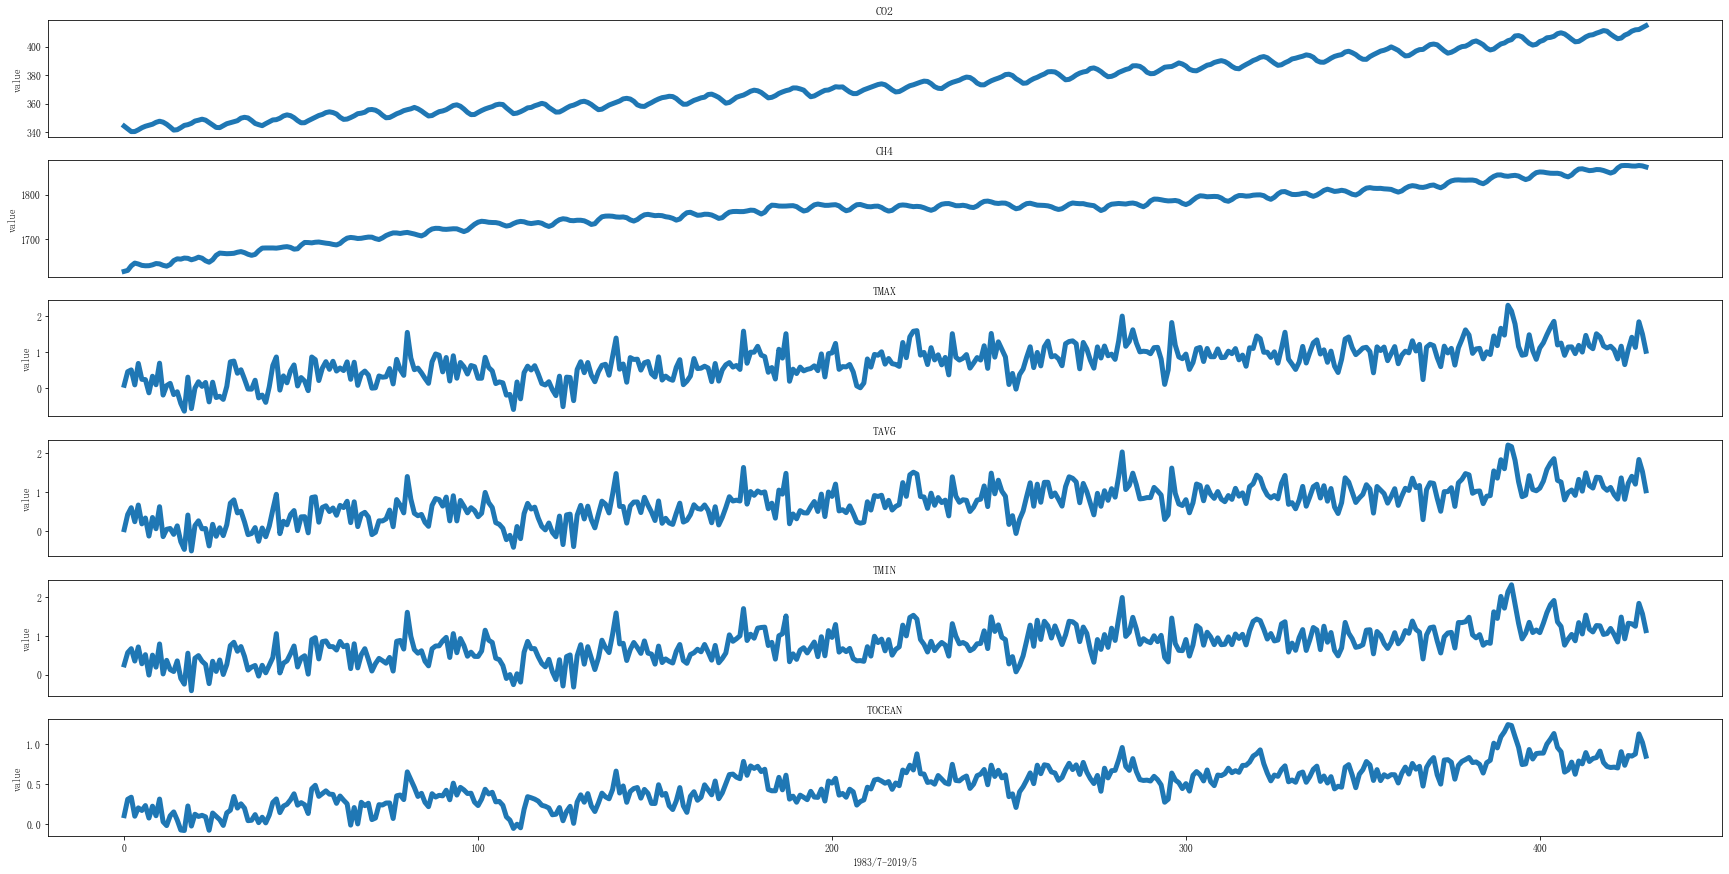

In [1]:
from pandas import read_csv
from matplotlib import pyplot
import datetime
import numpy as np
import matplotlib as mpl
import matplotlib
import matplotlib.pyplot as plt
mpl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
%matplotlib inline
# load dataset
dataset = read_csv('data.csv', header=0)
# print(dataset.values[:,0])

# month=dataset.values[:,0]
month=list(map(str,dataset.values[:,0]))
# print(month)
# print(type(month[0]))
values = dataset.values

# specify columns to plot
groups = list(range(1,len(dataset.columns)))
i = 1
# plot each column

start = datetime.datetime(1983, 7, 1)
end = datetime.datetime(2019, 5, 1)
# 设置日期的间隔为1
delta = datetime.timedelta(days=30.4)
 
# 生成一个matplotlib可以识别的日期对象
dates = mpl.dates.drange(start, end, delta)
# print(dates)

fig= pyplot.figure(figsize = (30,15))
for group in groups:
    
    plt.subplot(len(groups),1,i)
    i=i+1
    
    if i!=len(groups)+1:
        plt.xticks([])
    else:
        plt.xlabel("1983/7-2019/5")
#         pyplot.plot(month,values[:, group])
#     else:
    pyplot.plot(values[:, group],linewidth=5)
    pyplot.title(dataset.columns[group], loc='center')
    
#     pyplot.xlabel("time")
    pyplot.ylabel("value")
#     pyplot.xticks(rotation=90,fontsize=4)

pyplot.savefig("各类特征真实值.png",dpi=240)
#     pyplot.show()

In [2]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 
# 转换序列成监督学习问题
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
#     print(n_vars)
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

def series_to_supervised(data, n_in=1, n_out=1,y_columns=[0],dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
#     print(n_vars)
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df[y_columns].shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in y_columns]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# 加载数据集
dataset = read_csv('data.csv', header=0)
values = dataset.values[:,1:]
feature=values.shape[1]

# print(values)
# # 整数编码
# encoder = LabelEncoder()
# values[:,4] = encoder.fit_transform(values[:,4])
# # ensure all data is float
# values = values.astype('float32')

# 归一化特征
scaler = MinMaxScaler(feature_range=(0, 1,2,3,4))
scaled = scaler.fit_transform(values)
# scaled=values

# 构建监督学习问题
n_in=48
reframed = series_to_supervised(scaled, n_in, 1,y_columns=list(range(feature)))
print(reframed.head(5))
# 分割为训练集和测试集
values = reframed.values

n_train_hours = 300
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# 分为输入输出
train_X, train_y = train[:, :-feature], train[:, -feature:]
print(-values.shape[1])
test_X, test_y = test[:, :-feature], test[:, -feature:]
# 重塑成3D形状 [样例, 时间步, 特征]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

Using TensorFlow backend.


    var1(t-48)  var2(t-48)  var3(t-48)  var4(t-48)  var5(t-48)  var6(t-48)  \
48    0.051675    0.000000    0.244801    0.200890    0.243947    0.140285   
49    0.025838    0.009155    0.372656    0.344329    0.359868    0.294824   
50    0.000000    0.052018    0.389703    0.408451    0.397285    0.314329   
51    0.000404    0.078236    0.248210    0.276130    0.280264    0.135034   
52    0.016687    0.069496    0.450733    0.433655    0.413426    0.213803   

    var1(t-47)  var2(t-47)  var3(t-47)  var4(t-47)  ...  var3(t-1)  var4(t-1)  \
48    0.025838    0.009155    0.372656    0.344329  ...   0.380498   0.342476   
49    0.000000    0.052018    0.389703    0.408451  ...   0.436754   0.381394   
50    0.000404    0.078236    0.248210    0.276130  ...   0.237982   0.191994   
51    0.016687    0.069496    0.450733    0.433655  ...   0.317081   0.321720   
52    0.036334    0.056596    0.300375    0.255374  ...   0.284010   0.323573   

    var5(t-1)  var6(t-1)   var1(t)   var2(t)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 300 samples, validate on 83 samples
Epoch 1/400
 - 3s - loss: 0.4240 - val_loss: 0.5887
Epoch 2/400
 - 0s - loss: 0.2981 - val_loss: 0.2553
Epoch 3/400
 - 0s - loss: 0.1420 - val_loss: 0.1309
Epoch 4/400
 - 0s - loss: 0.1023 - val_loss: 0.2482
Epoch 5/400
 - 0s - loss: 0.1225 - val_loss: 0.2434
Epoch 6/400
 - 0s - loss: 0.1032 - val_loss: 0.1398
Epoch 7/400
 - 0s - loss: 0.0976 - val_loss: 0.1465
Epoch 8/400
 - 0s - loss: 0.0923 - val_loss: 0.1781
Epoch 9/400
 - 0s - loss: 0.0923 - val_loss: 0.1412
Epoch 10/400
 - 0s - loss: 0.0840 - val_loss: 0.1380
Epoch 11/400
 - 0s - loss: 0.0823 - val_loss: 0.1458
Epoch 12/400
 - 0s - loss: 0.0793 - val_loss: 0.1124
Epoch 13/400
 - 0s - loss: 0.0770 - val_loss: 0.1138
Epoch 14/400
 - 0s - loss: 0.0754 - val_loss: 0.0988
Epoch 15/400
 - 0s - loss: 0.0743 - val_loss: 0.1035
Epoch 16/400
 - 0s - loss: 0.0735 - val_loss: 0.0

Epoch 144/400
 - 0s - loss: 0.0509 - val_loss: 0.1025
Epoch 145/400
 - 0s - loss: 0.0480 - val_loss: 0.0970
Epoch 146/400
 - 0s - loss: 0.0483 - val_loss: 0.0849
Epoch 147/400
 - 0s - loss: 0.0472 - val_loss: 0.0798
Epoch 148/400
 - 0s - loss: 0.0487 - val_loss: 0.0923
Epoch 149/400
 - 0s - loss: 0.0488 - val_loss: 0.1067
Epoch 150/400
 - 0s - loss: 0.0469 - val_loss: 0.1019
Epoch 151/400
 - 0s - loss: 0.0467 - val_loss: 0.1078
Epoch 152/400
 - 0s - loss: 0.0474 - val_loss: 0.0943
Epoch 153/400
 - 0s - loss: 0.0463 - val_loss: 0.0829
Epoch 154/400
 - 0s - loss: 0.0469 - val_loss: 0.0816
Epoch 155/400
 - 0s - loss: 0.0476 - val_loss: 0.0888
Epoch 156/400
 - 0s - loss: 0.0467 - val_loss: 0.0997
Epoch 157/400
 - 0s - loss: 0.0459 - val_loss: 0.1040
Epoch 158/400
 - 0s - loss: 0.0456 - val_loss: 0.0972
Epoch 159/400
 - 0s - loss: 0.0436 - val_loss: 0.0904
Epoch 160/400
 - 0s - loss: 0.0429 - val_loss: 0.0909
Epoch 161/400
 - 0s - loss: 0.0443 - val_loss: 0.0960
Epoch 162/400
 - 0s - loss: 

Epoch 296/400
 - 0s - loss: 0.0357 - val_loss: 0.1218
Epoch 297/400
 - 0s - loss: 0.0457 - val_loss: 0.1014
Epoch 298/400
 - 0s - loss: 0.0427 - val_loss: 0.1210
Epoch 299/400
 - 0s - loss: 0.0380 - val_loss: 0.0827
Epoch 300/400
 - 0s - loss: 0.0338 - val_loss: 0.0959
Epoch 301/400
 - 0s - loss: 0.0327 - val_loss: 0.1017
Epoch 302/400
 - 0s - loss: 0.0339 - val_loss: 0.0963
Epoch 303/400
 - 0s - loss: 0.0315 - val_loss: 0.0966
Epoch 304/400
 - 0s - loss: 0.0314 - val_loss: 0.0828
Epoch 305/400
 - 0s - loss: 0.0311 - val_loss: 0.0879
Epoch 306/400
 - 0s - loss: 0.0309 - val_loss: 0.0926
Epoch 307/400
 - 0s - loss: 0.0290 - val_loss: 0.1198
Epoch 308/400
 - 0s - loss: 0.0313 - val_loss: 0.1094
Epoch 309/400
 - 0s - loss: 0.0356 - val_loss: 0.1139
Epoch 310/400
 - 0s - loss: 0.0331 - val_loss: 0.0955
Epoch 311/400
 - 0s - loss: 0.0309 - val_loss: 0.0951
Epoch 312/400
 - 0s - loss: 0.0292 - val_loss: 0.0992
Epoch 313/400
 - 0s - loss: 0.0289 - val_loss: 0.0881
Epoch 314/400
 - 0s - loss: 

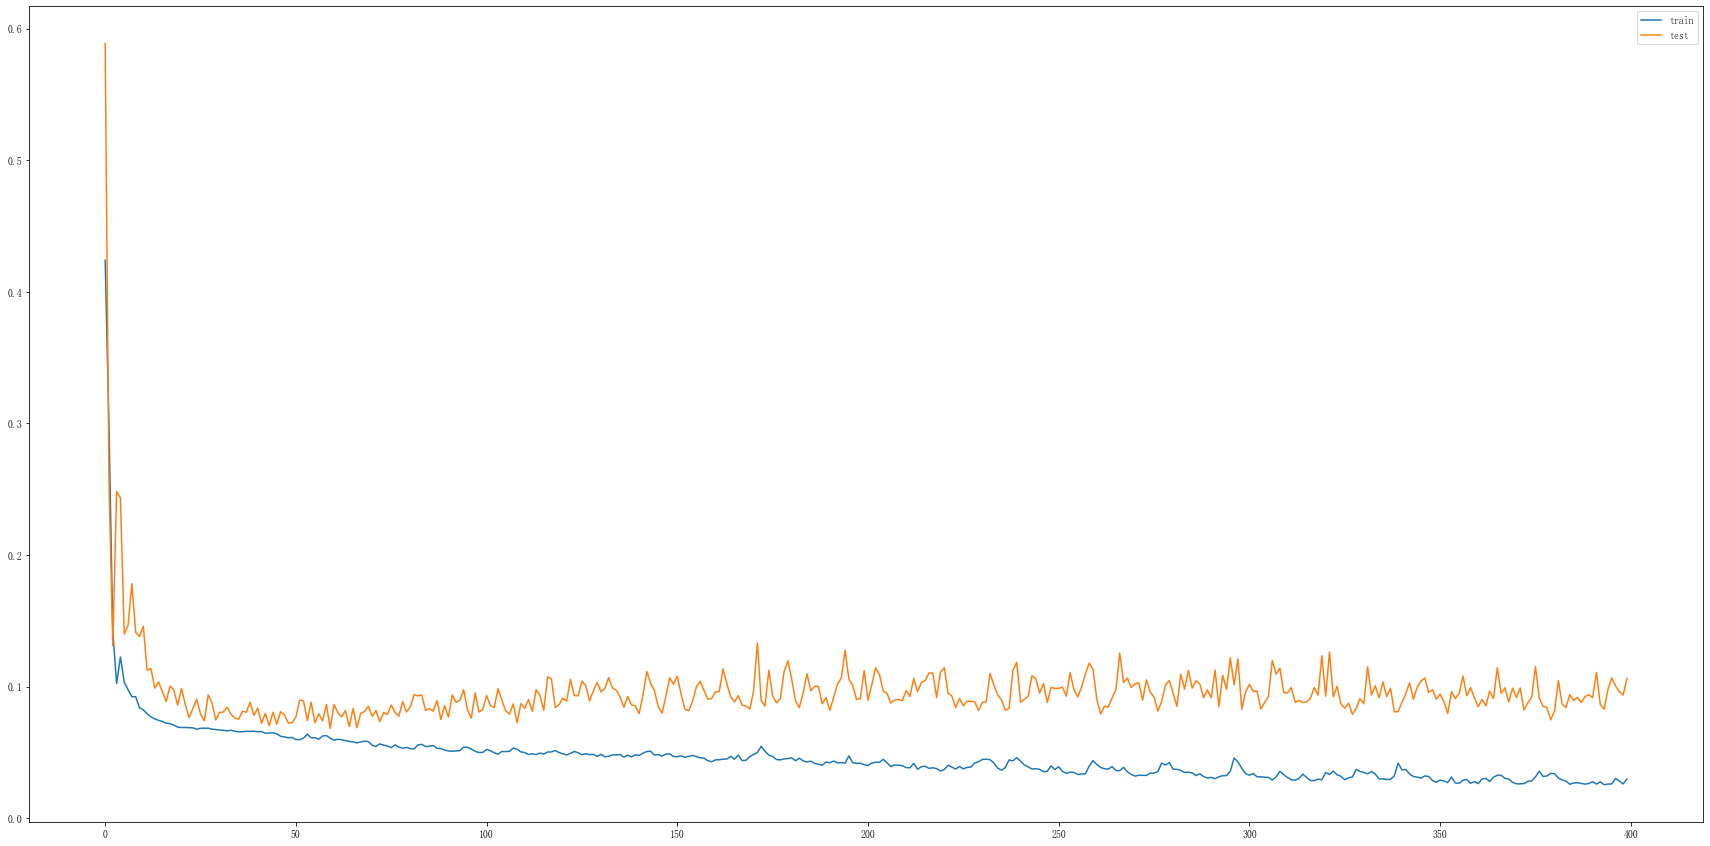

In [3]:
# 设计网络
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2]),return_sequences=True))
model.add(LSTM(200, input_shape=(train_X.shape[1], train_X.shape[2]),return_sequences=True))
model.add(LSTM(100,return_sequences=False))
model.add(Dense(100))
model.add(Dense(feature))
model.compile(loss='mae', optimizer='adam')
# 拟合神经网络模型
history = model.fit(train_X, train_y, epochs=400, batch_size=80, validation_data=(test_X, test_y), verbose=2, shuffle=True)

# 绘制训练测试误差图
fig= pyplot.figure(figsize = (30,15))
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
plt.savefig('训练误差图.png')
pyplot.show()


In [4]:
# 做出预测
yhat = model.predict(test_X)

test_X1 = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# 反向转换预测值比例
# inv_yhat = concatenate((yhat, test_X1[:, 1:]), axis=1)

# inv_yhat = concatenate((yhat, test_X1[:, 2:]), axis=1)
inv_yhat=yhat
inv_yhat = scaler.inverse_transform(inv_yhat)
print(inv_yhat.shape)
# inv_yhat = inv_yhat[:,0]
# 反向转换实际值比例
test_y1 = test_y.reshape((len(test_y), len(groups)))
# inv_y = concatenate((test_y1, test_X1[:, 2:]), axis=1)
inv_y=test_y1
inv_y = scaler.inverse_transform(inv_y)
# inv_y = inv_y[:,0]


(83, 6)


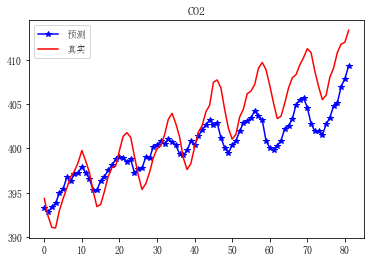

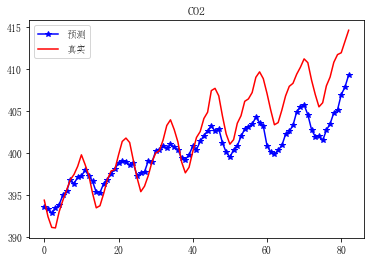

In [5]:
# 绘制历史数据和预测数据图
plt.plot(inv_yhat[1:,0],label='预测',c='b',linestyle='-', marker='*')
plt.plot(inv_y[:-1,0],label="真实",c='r')
plt.legend()
plt.title('CO2')
plt.show()


plt.plot(inv_yhat[:,0],label='预测',c='b',linestyle='-', marker='*')
plt.plot(inv_y[:,0],label="真实",c='r')
plt.legend()
plt.title('CO2')
plt.show()


Test RMSE: 3.349


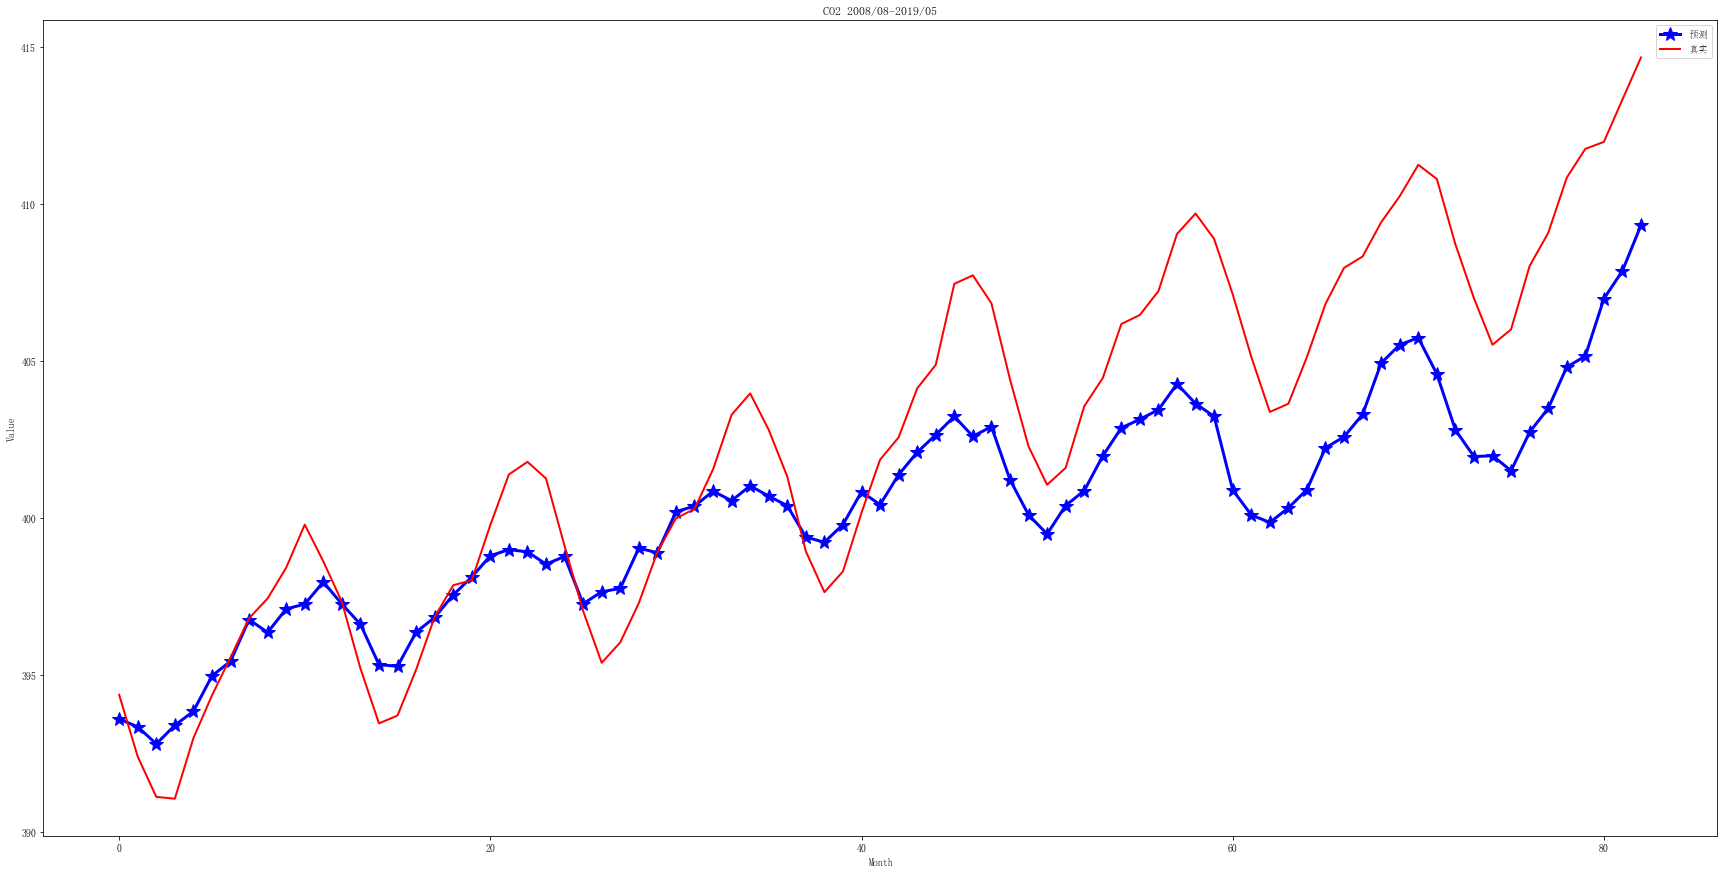

Test RMSE: 21.324


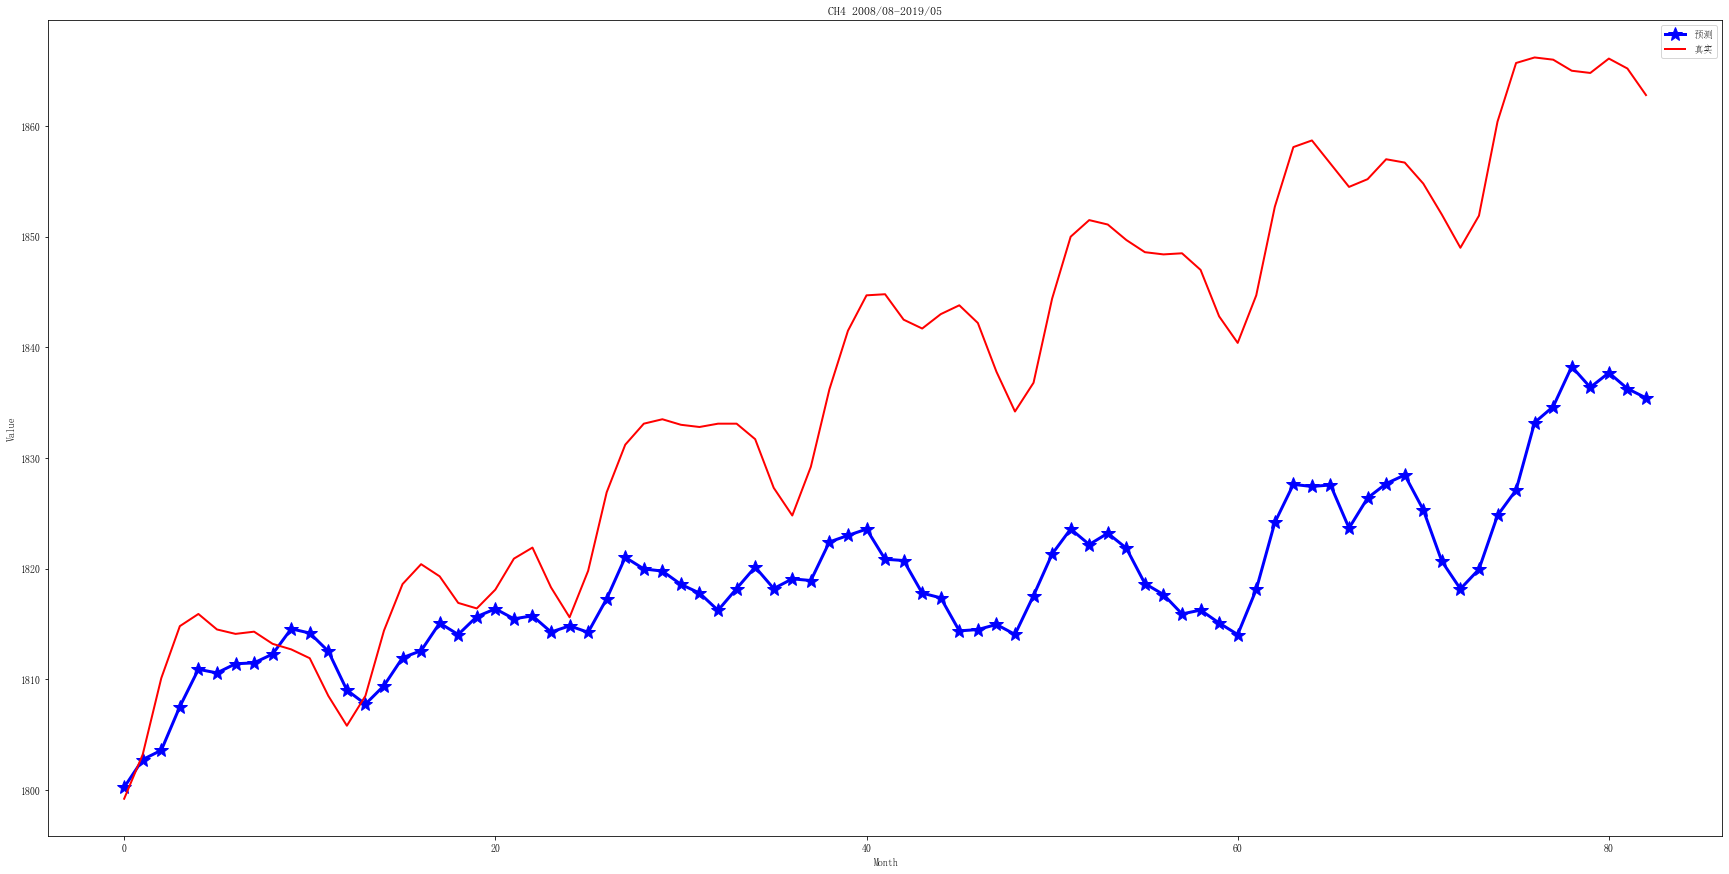

Test RMSE: 0.432


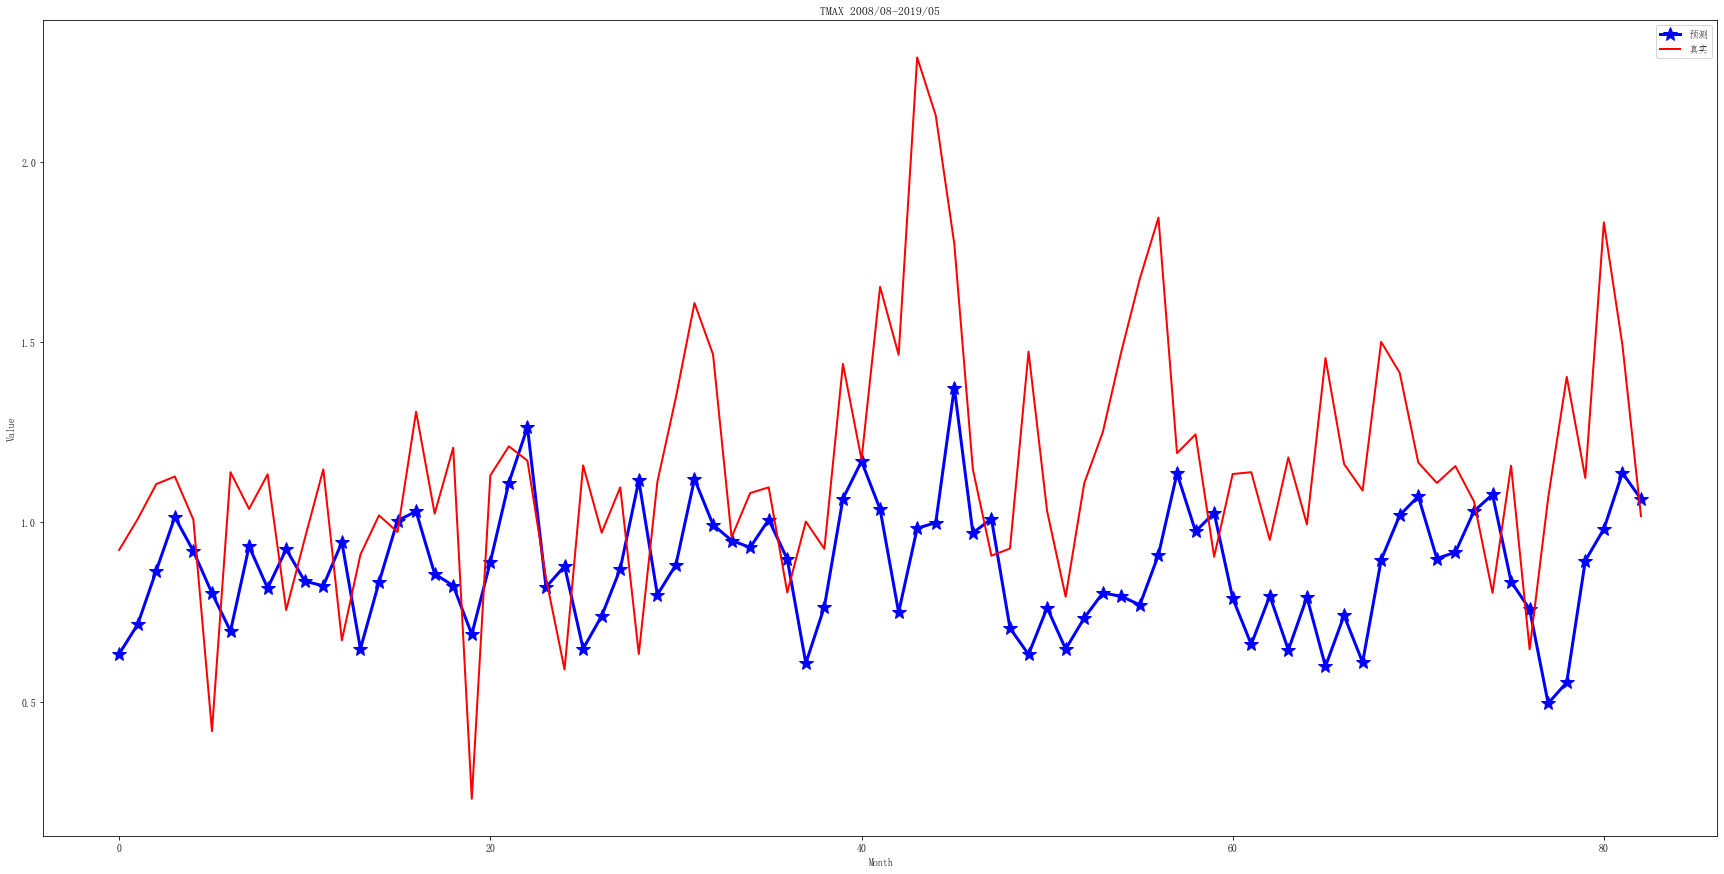

Test RMSE: 0.424


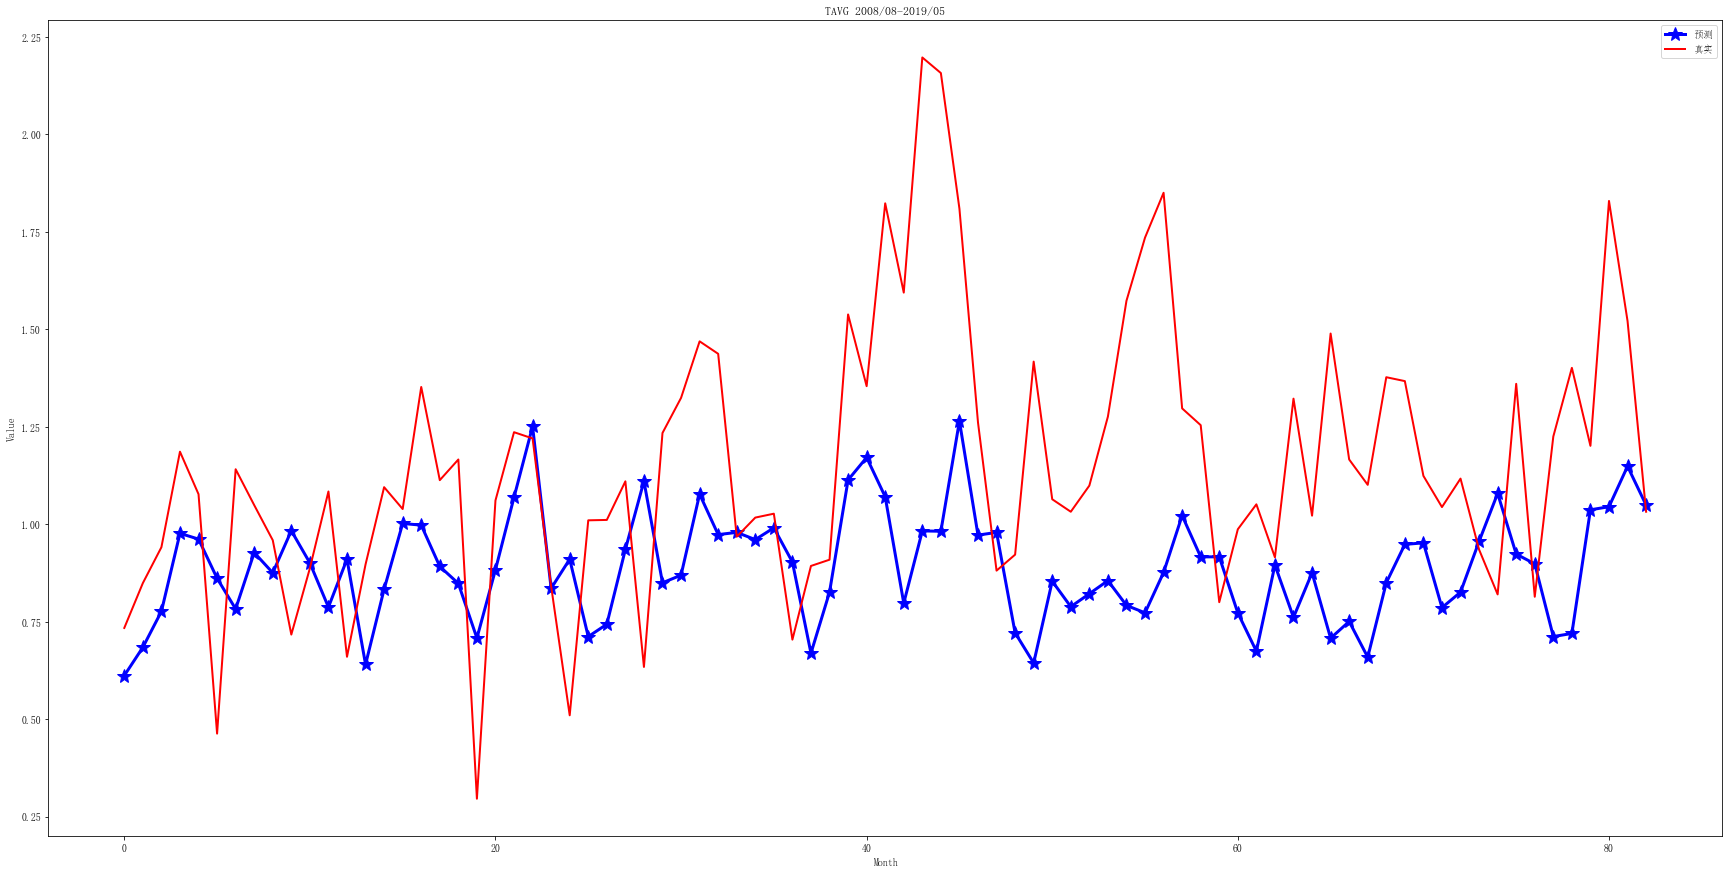

Test RMSE: 0.462


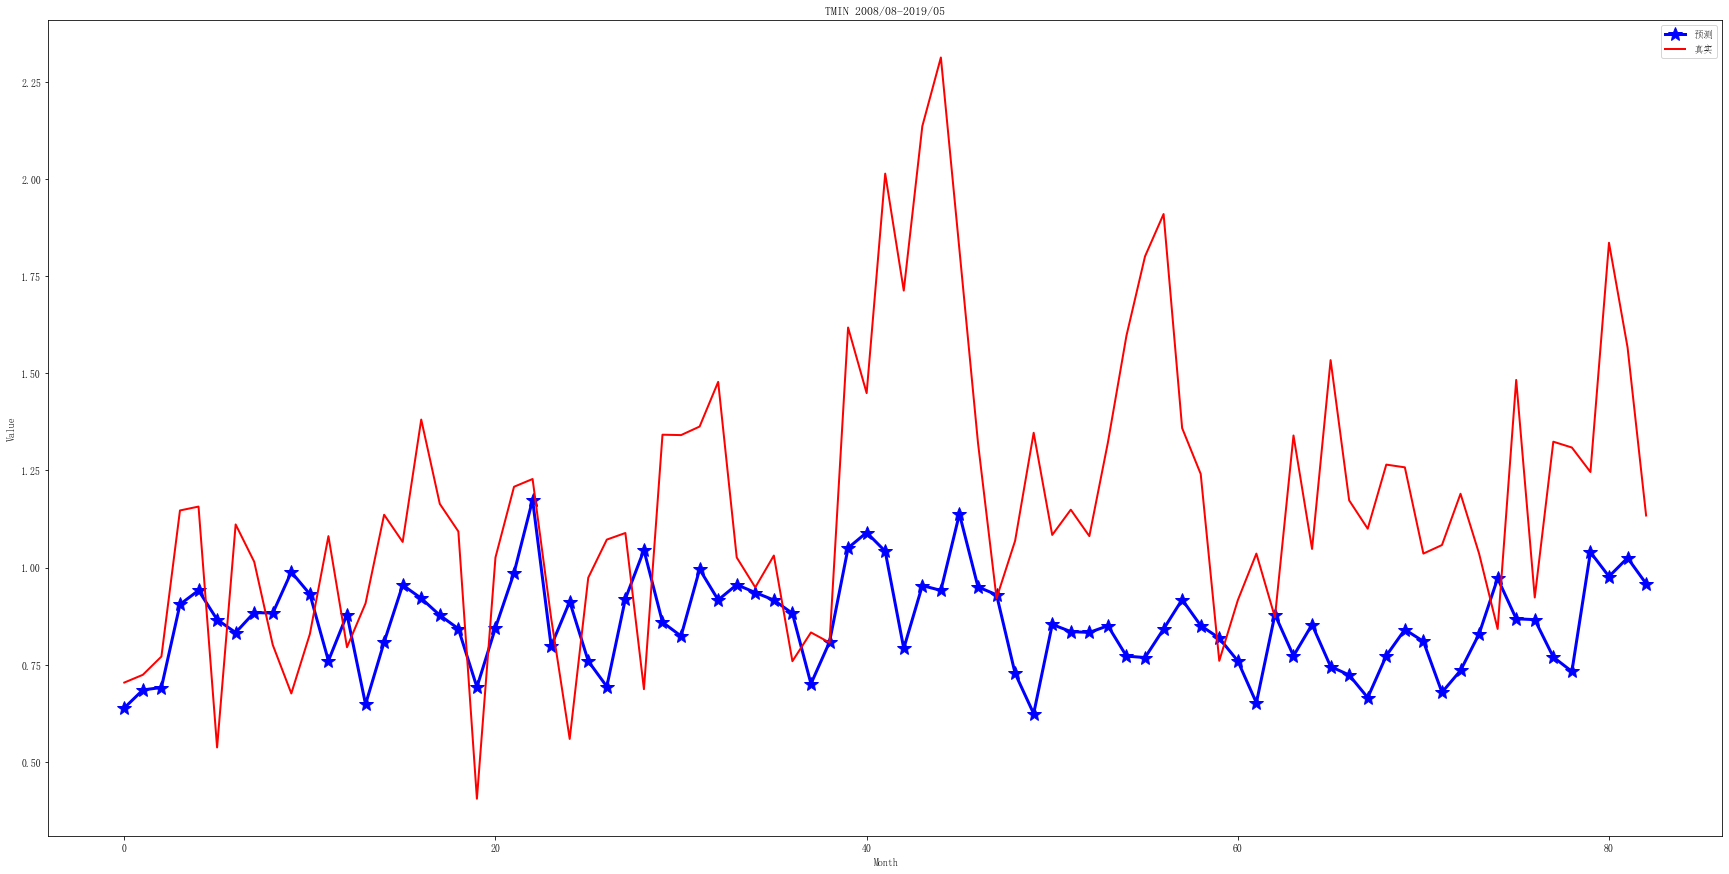

Test RMSE: 0.248


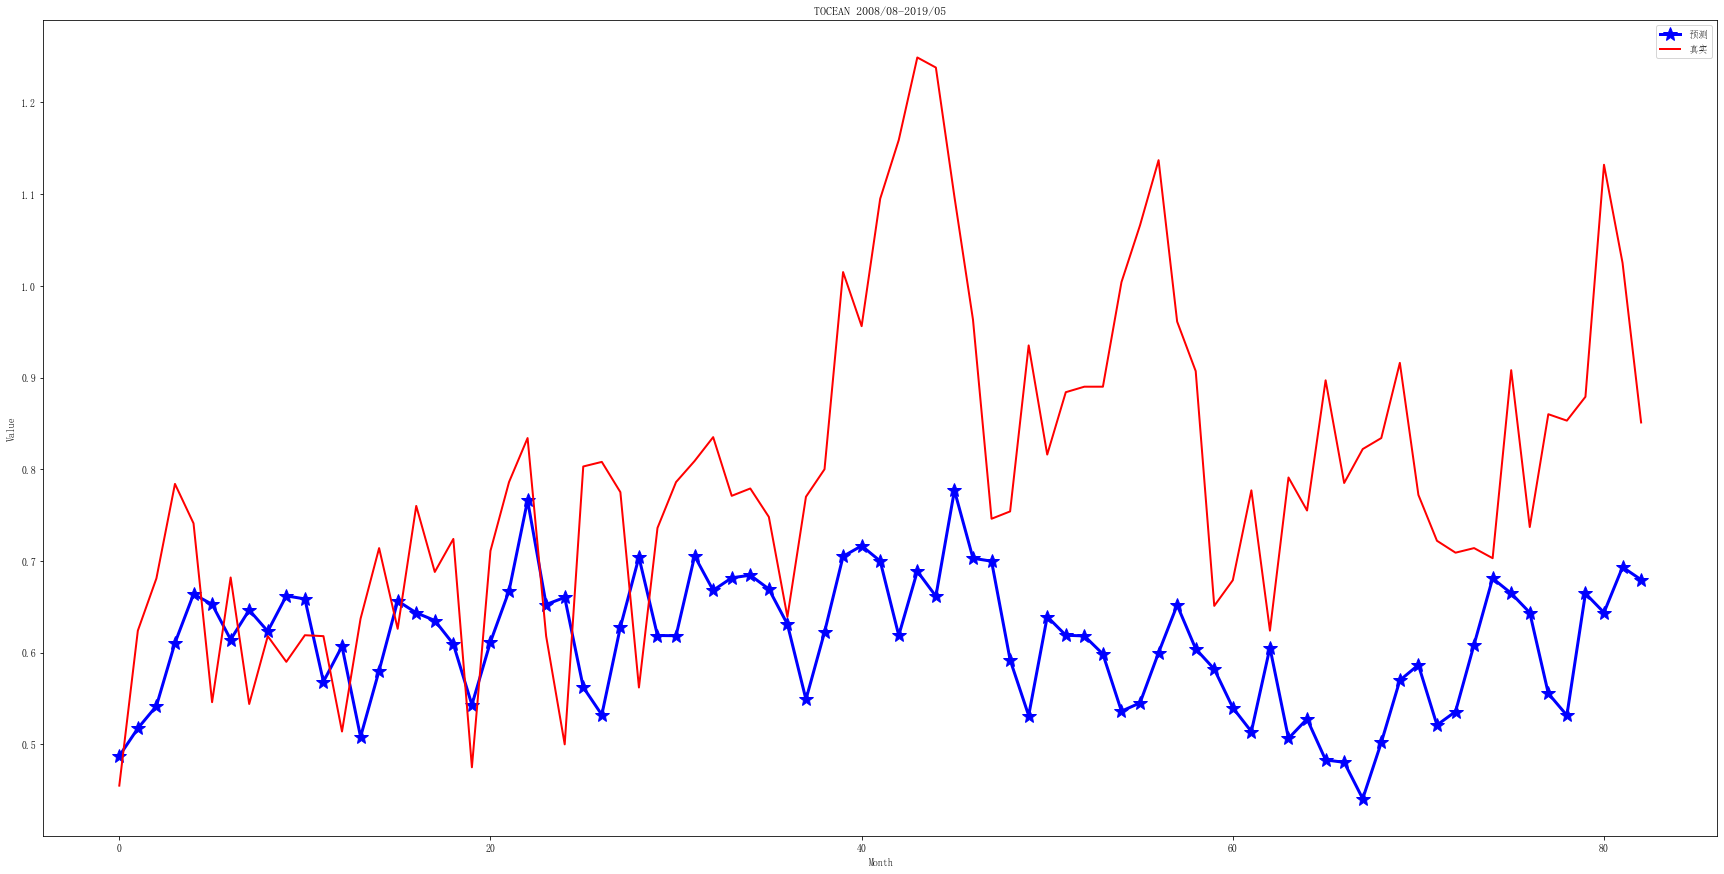

In [6]:
# 绘制历史数据和预测数据图
mpl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
for i in groups:
    rmse = sqrt(mean_squared_error(inv_yhat[:,i-1], inv_y[:,i-1]))
    print('Test RMSE: %.3f' % rmse)

    fig= pyplot.figure(figsize = (30,15))
    plt.plot(inv_yhat[:,i-1],label='预测',c='b',linestyle='-', marker='*',linewidth=3,ms=15)
    plt.plot(inv_y[:,i-1],label="真实",c='r',linewidth=2,ms=5)
    plt.legend()
    plt.title('{} 2008/08-2019/05'.format(dataset.columns[i]))
    plt.xlabel("Month")
    plt.ylabel("Value")
    plt.savefig('{}预测模型检验.png'.format(dataset.columns[i]))
    
    plt.show()
    # 计算RMSE





In [7]:
#预测未来25年
alltime=12*25
# test_25=test_X[-1:,:]
# print(test_25)

pred_x=test_y[-n_in:,:].reshape(1,1,n_in*feature)
print(pred_x.shape)
import copy

# print(pred_y[-1,:].shape)
pred_y=np.zeros((1,feature))
for i in range(alltime):
    tmp=model.predict(pred_x)
    pred_x[0,0,:-feature]=pred_x[0,0,feature:]
    pred_x[0,0,-feature:]=copy.deepcopy(tmp[0,:])
#     print(pred_y.shape,tmp.shape)
    pred_y=np.vstack((pred_y,copy.deepcopy(tmp)))
    
pred_y=pred_y[1:,:]
print(pred_y.shape)
print(pred_y)
    

#     pre=pre.reshape(1,1,(pre.shape[-1]))
#     pred_y=np.vstack((pred_y,pre))
    

(1, 1, 288)
(300, 6)
[[0.90396476 0.83832657 0.50280553 0.47813386 0.42125022 0.47687209]
 [0.87625492 0.82468879 0.49516463 0.48540273 0.43873382 0.49520415]
 [0.86071283 0.82749033 0.52408892 0.5030458  0.42836756 0.49849579]
 ...
 [0.91575652 0.88912565 0.60757411 0.619416   0.53806806 0.61466426]
 [0.91739184 0.88813883 0.5948388  0.60678893 0.52891123 0.60987544]
 [0.91731203 0.88595587 0.56662267 0.57847905 0.50729585 0.58931214]]


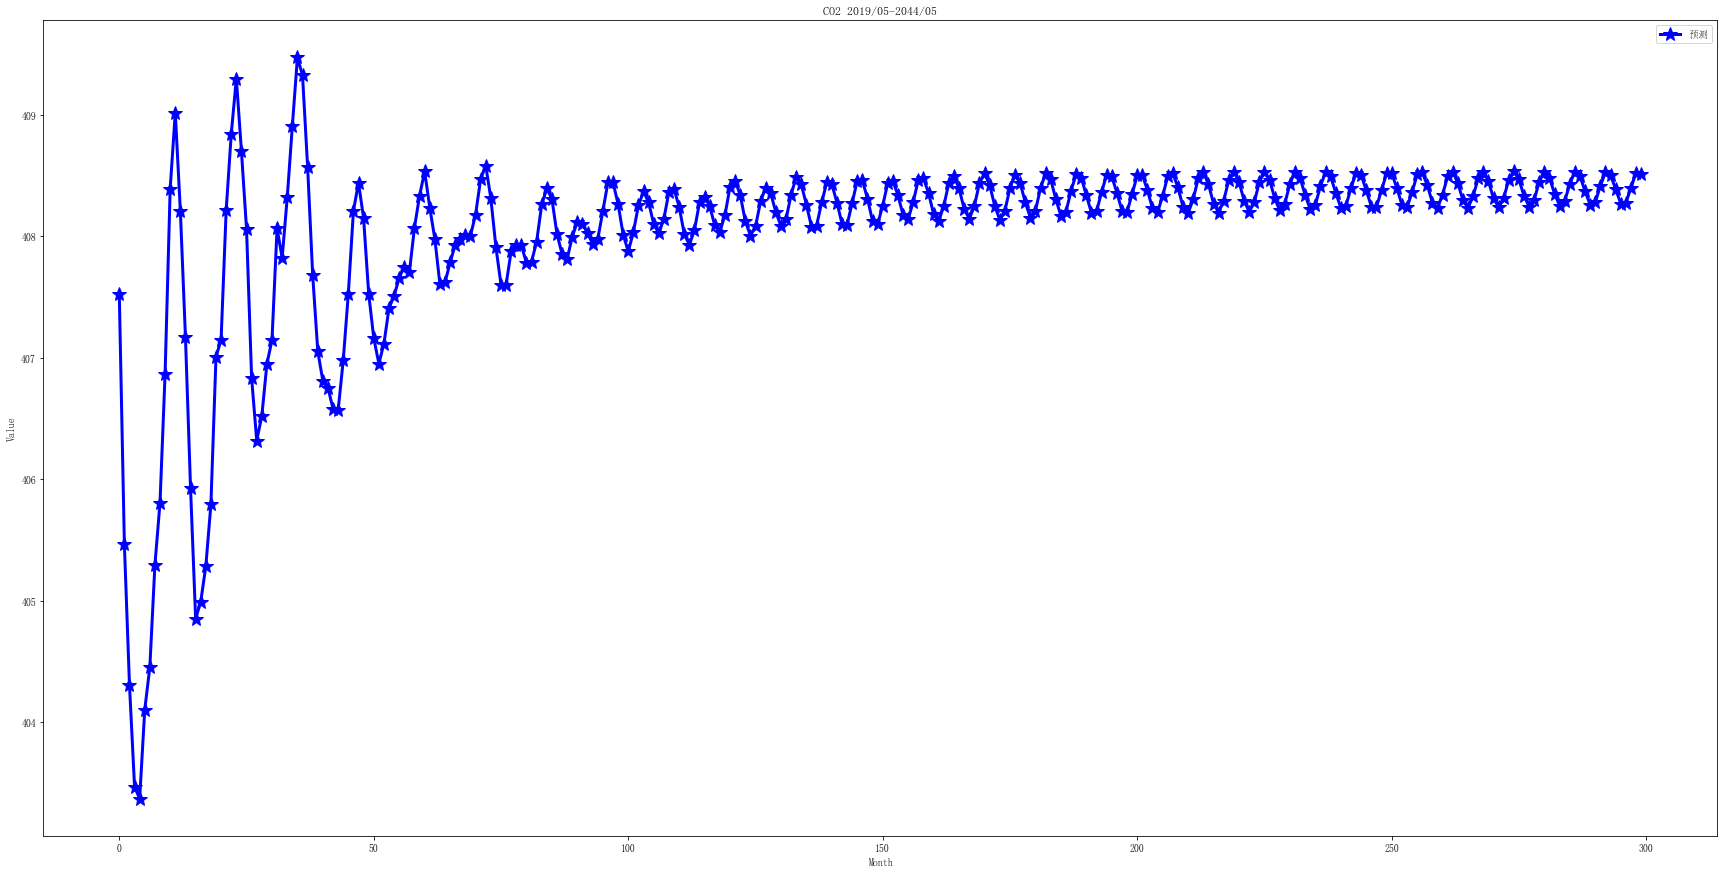

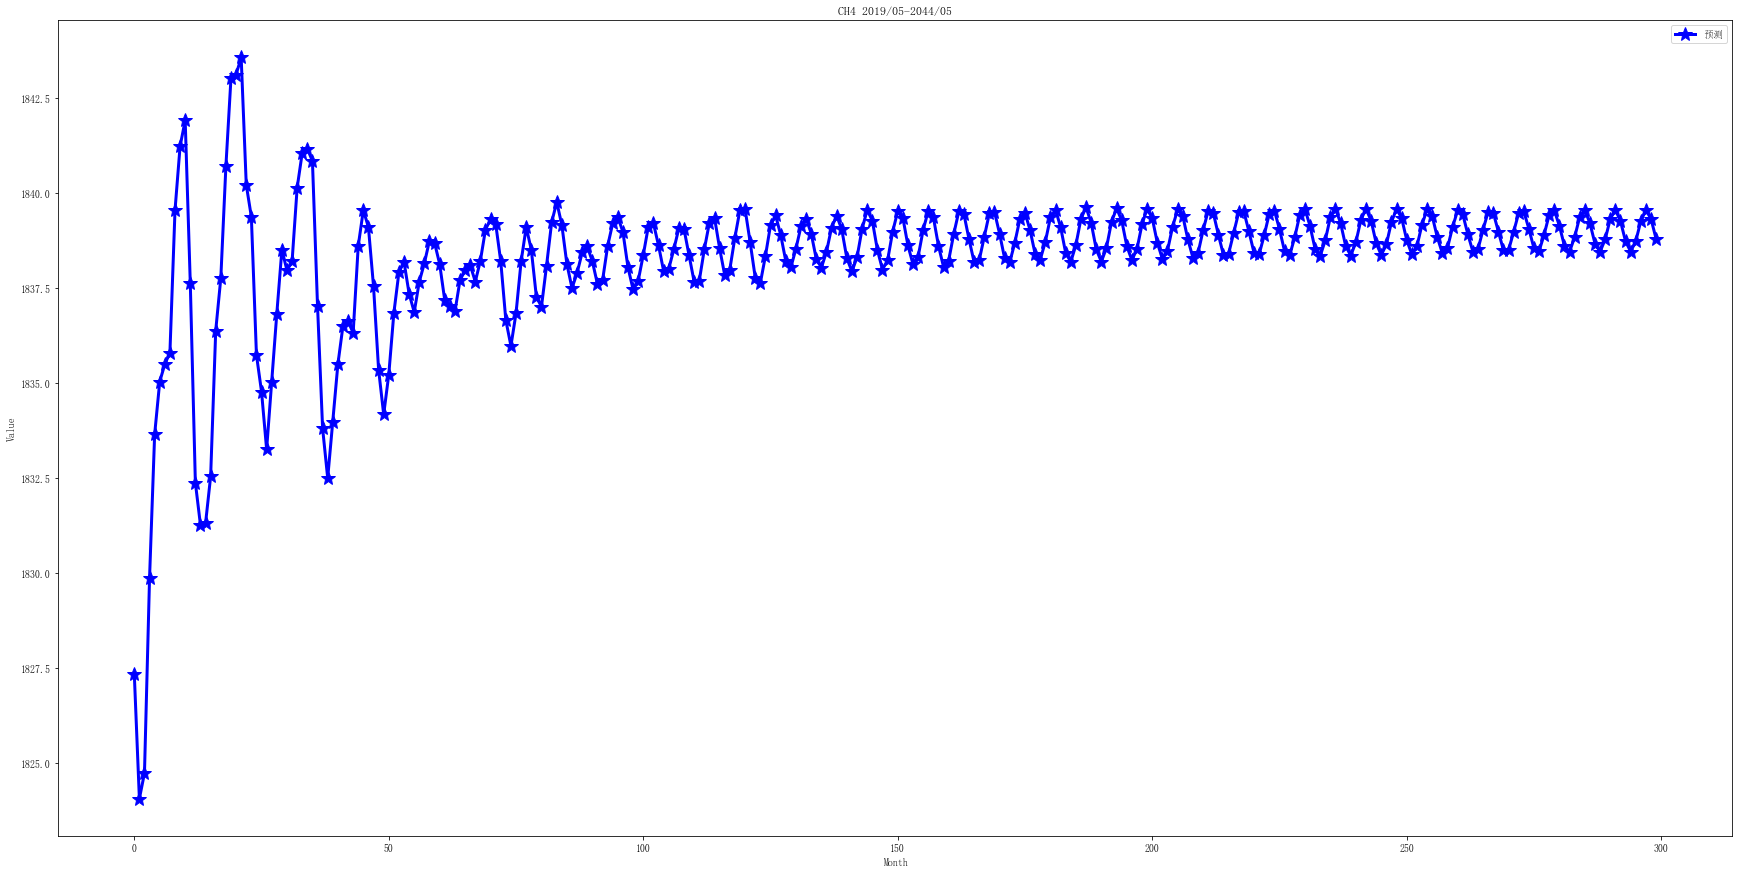

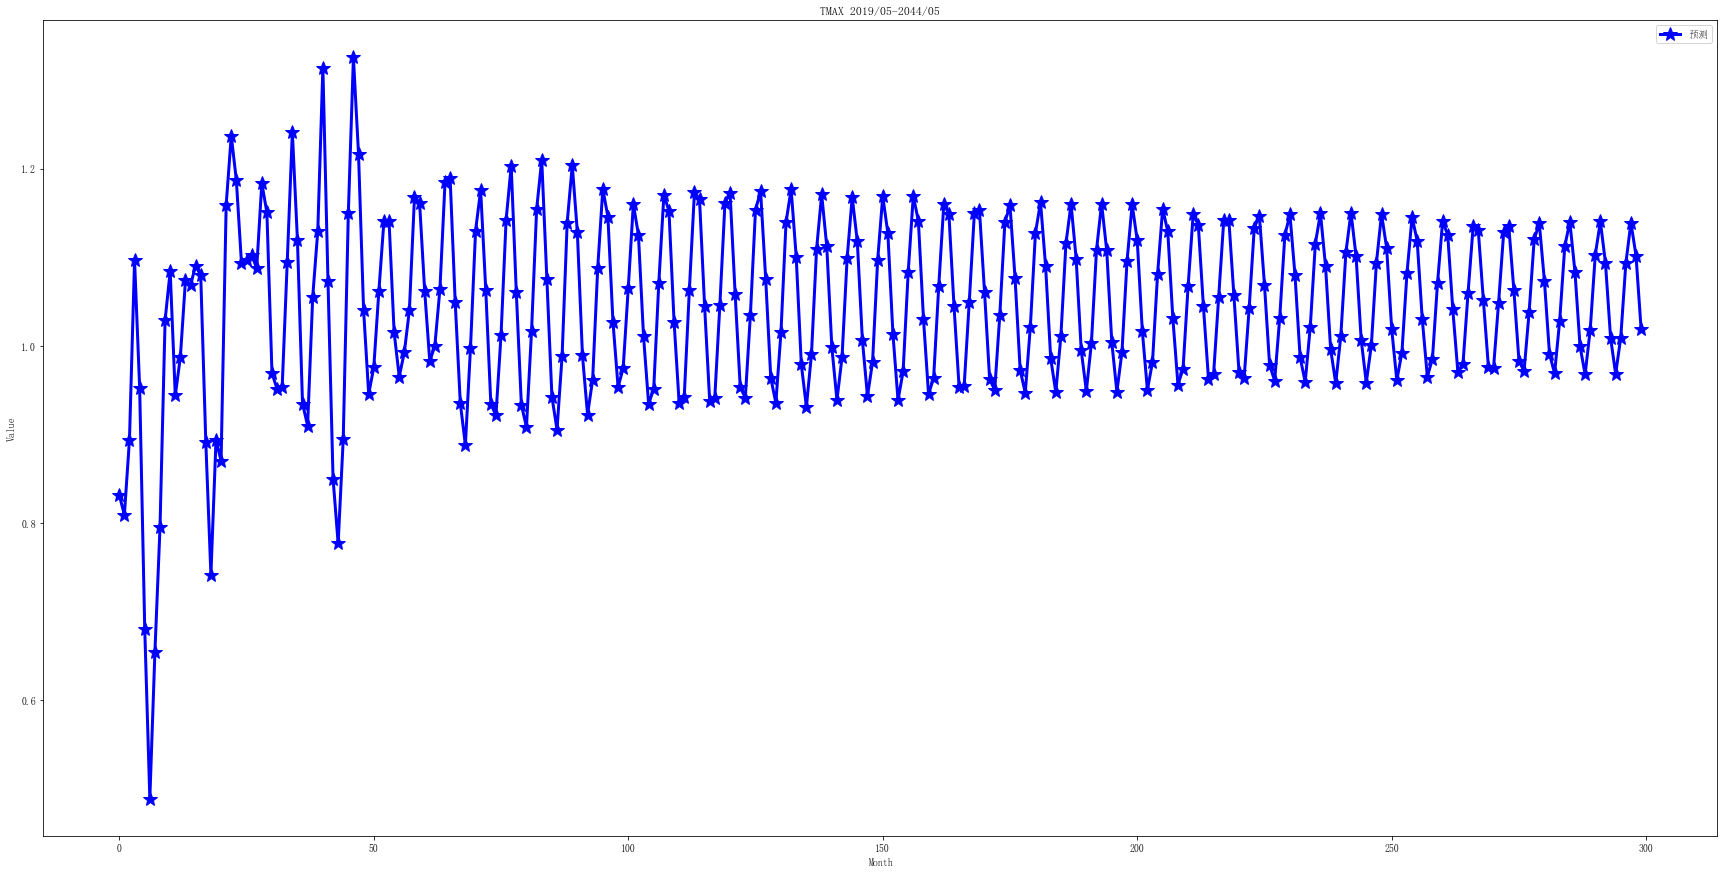

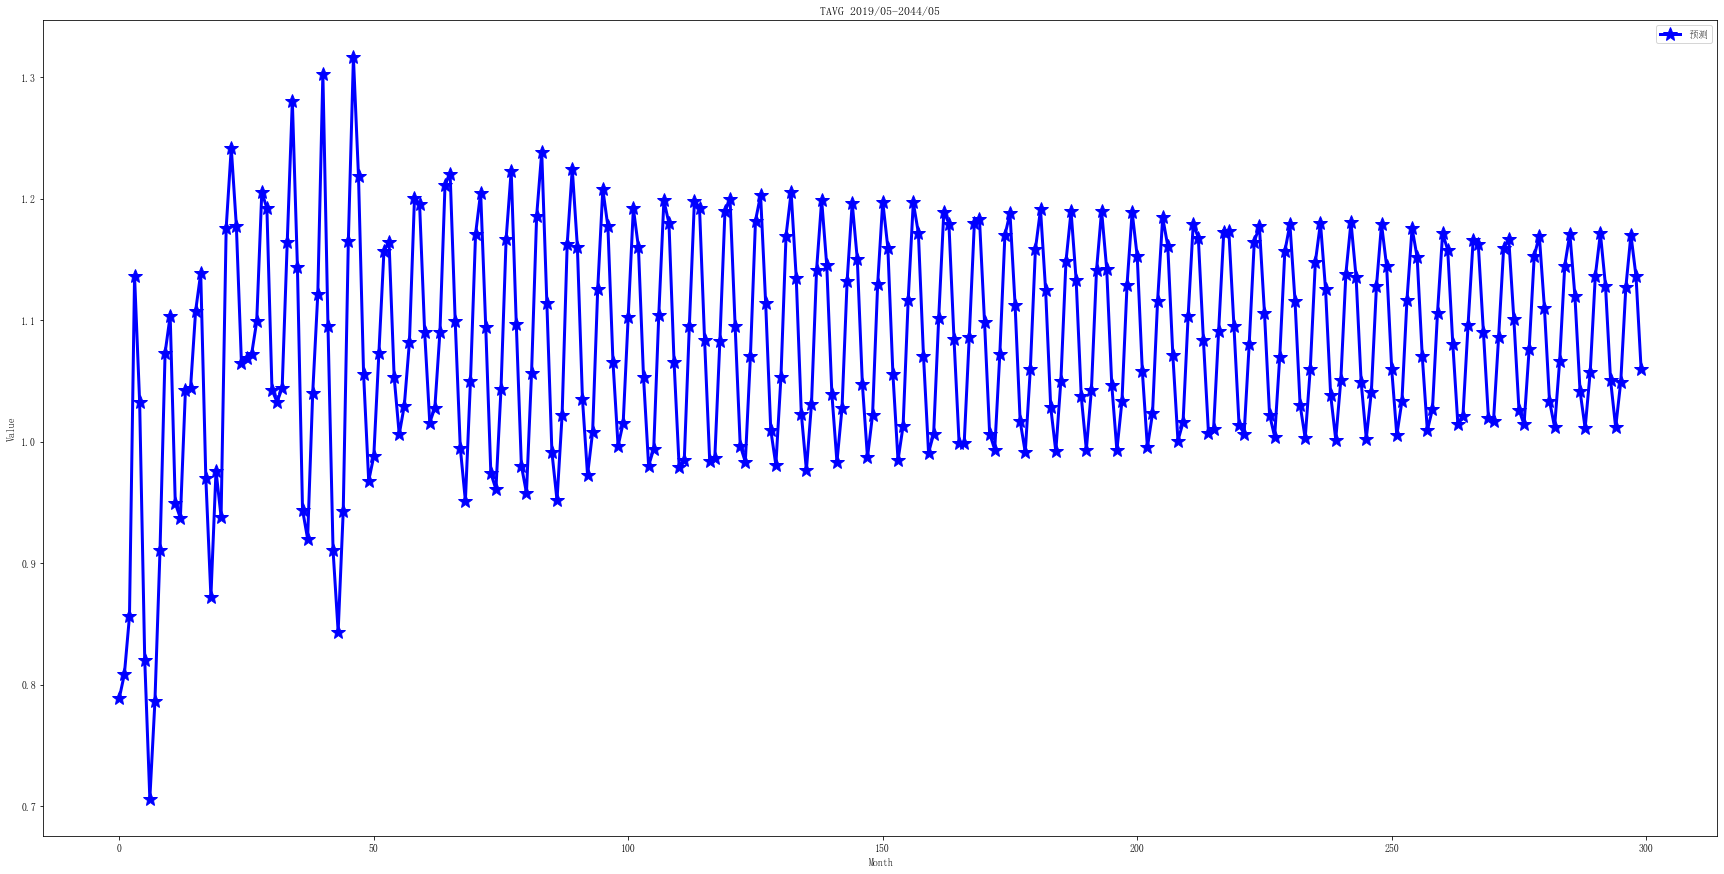

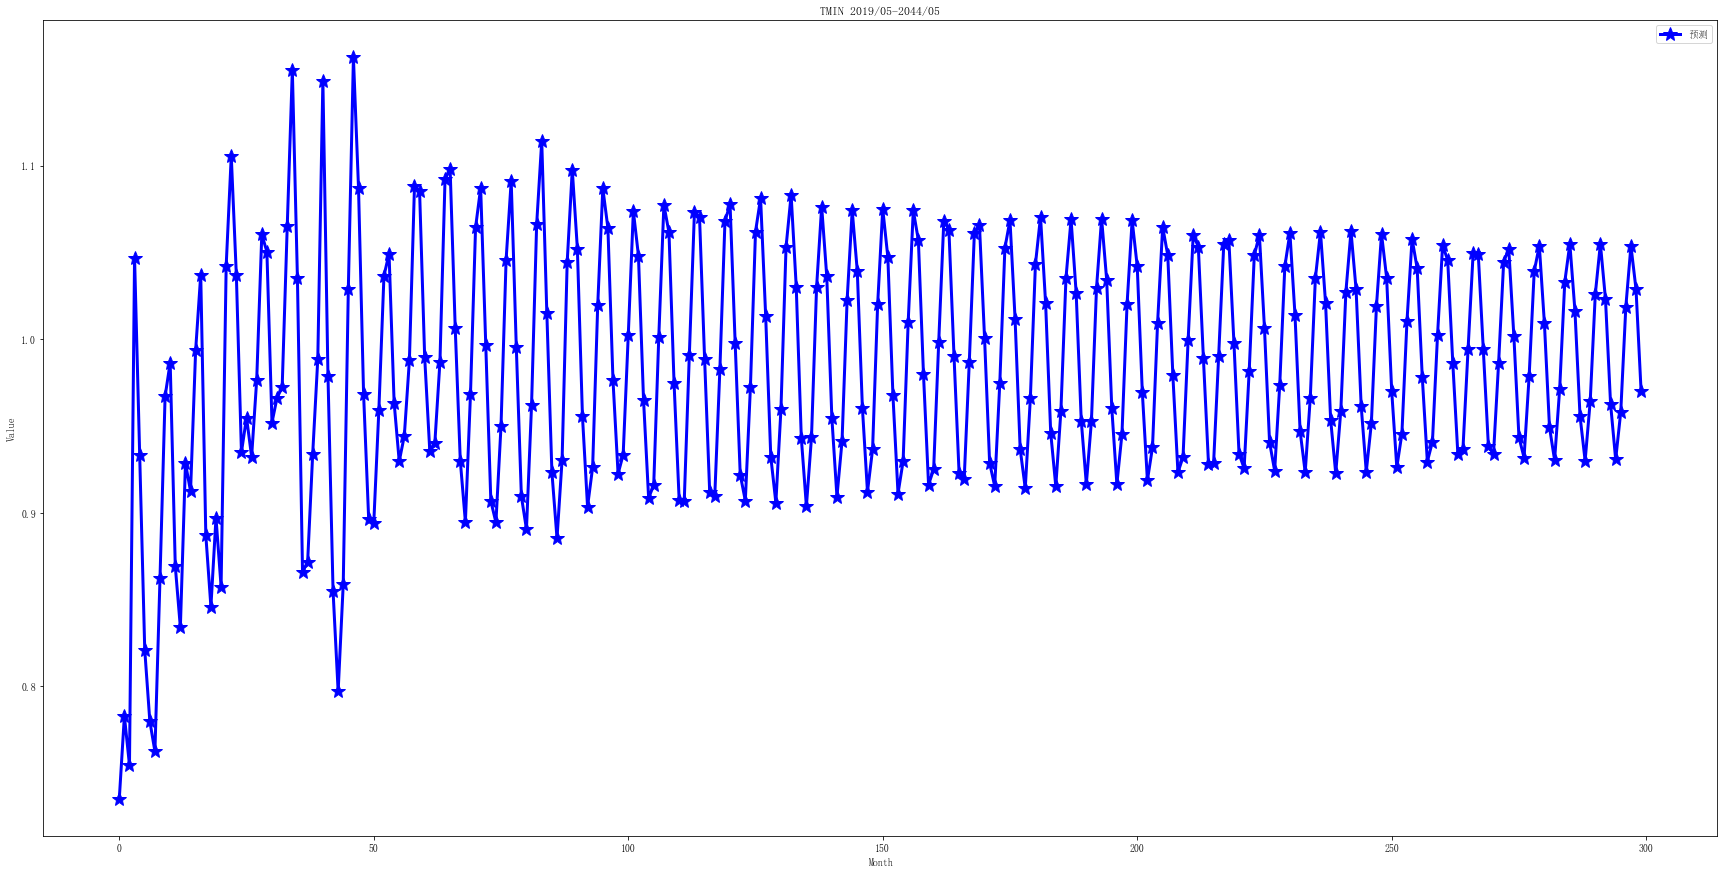

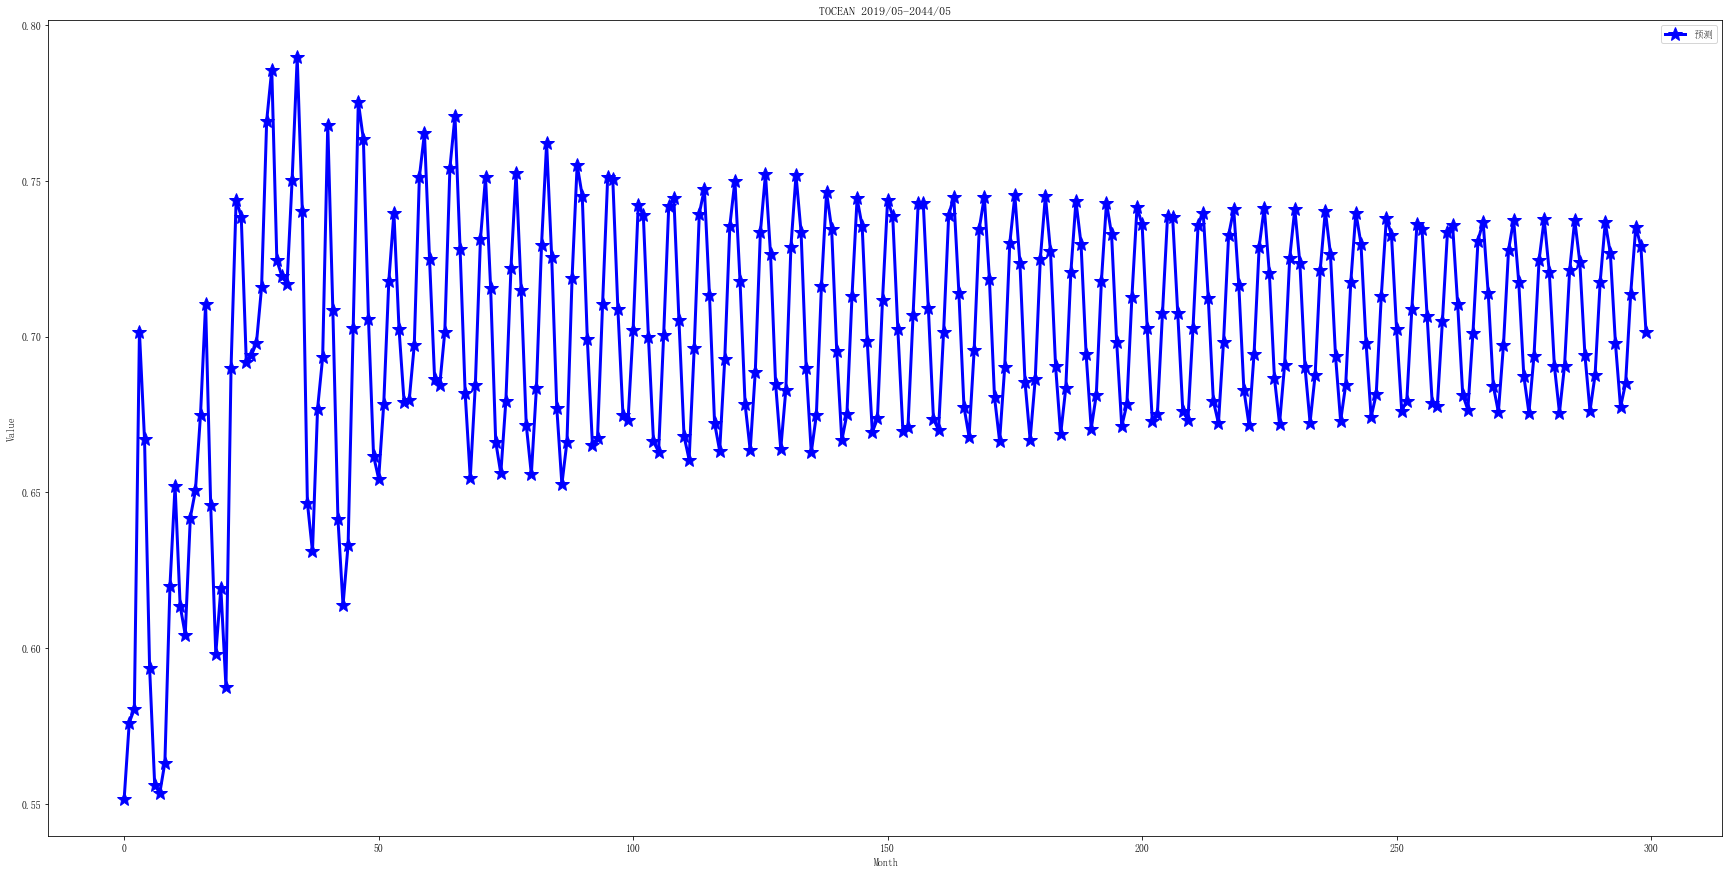

In [8]:


inv_pred_y = scaler.inverse_transform(pred_y)

for i in groups:
    # 绘制历史数据和预测数据图
    fig= pyplot.figure(figsize = (30,15))
    plt.plot(inv_pred_y[:,i-1],label='预测',c='b',linestyle='-', marker='*',linewidth=3,ms=15)
    plt.legend()
    plt.title('{} 2019/05-2044/05'.format(dataset.columns[i]))
    plt.xlabel("Month")
    plt.ylabel("Value")
    plt.savefig('{}未来25年预测.png'.format(dataset.columns[i]))
    plt.show()
    # 计算RMSE
